In [1]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat

In [2]:
# creating path


path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'


path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'


path = "SavedModels/SyntheticMasked/"
date = '2023-12-17' # 2
config_name = 'config_001_masked.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_masked.pt'

path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-28' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_259999_hollowelbo.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-05' # 2
config_name = 'config_001_hollowdirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollowdirect.pt' 


path = "SavedModels/SyntheticRMDirect/"
date = '2023-12-20' # 2023-10-30 'Hollow-2023-10-29'
config_name = 'config_001_hollowCEDirect500K.yaml' # 'config_001_maze.yaml' 'config_001_rate001.yaml'
model_name = 'model_199999_hollowCEDirect500K.pt' 


path = "SavedModels/SyntheticMasked/"
date = '2024-01-14' # 2
config_name = 'config_001_maskedelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_maskedelbo.pt'

path = "SavedModels/SyntheticMasked/"
date = '2023-12-17' # 2
config_name = 'config_001_maskeddirect.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_maskeddirect.pt'


path = "SavedModels/SyntheticMasked/"
date = '2024-01-14' # 2
config_name = 'config_001_masked.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_masked.pt'

path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'

path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'


path = "SavedModels/Synthetic/"
date = '2023-12-18' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowelbo.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = "SavedModels/MNISTHollow/"
date = '2024-01-21' # 2
config_name = 'config_001_hollow_elbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_169999_hollow_elbo.pt'

path = "SavedModels/Synthetic/"
date = '2024-01-23' # 2
config_name = 'config_001_auxBert.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_auxBert.pt'

path = "SavedModels/SyntheticBert/"
date = '2023-12-28' # 2
config_name = 'config_001_bert500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_bert500K.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'


path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-29' # 2
config_name = 'config_001_auxhollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_29999_auxhollow.pt' 

path = 'SavedModels/MAZEprotein/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-28' # 2
config_name = 'config_001_auxProtein.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_auxProtein.pt' 


path = "SavedModels/Synthetic/"
date = '2024-01-25' # 2
config_name = 'config_001_onlyelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_onlyelbo.pt'

path = "SavedModels/SyntheticBert/"
date = '2023-12-28' # 2
config_name = 'config_001_bert500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_bert500K.pt'

path = "SavedModels/MNIST/"
date = '2024-01-29' # 2
config_name = 'config_001_unetnll.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unetnll.pt'

path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_unetlog.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_unetlog.pt' 

path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-02-01' # 2
config_name = 'config_001_hollow_aux.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_149999_hollow_aux.pt'

path = "SavedModels/Synthetic/"
date = '2024-01-29' # 2
config_name = 'config_001_hollowaux.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowaux.pt'

path = "SavedModels/Synthetic/"
date = '2024-01-23' # 2
config_name = 'config_001_auxBert.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_auxBert.pt'


path = "SavedModels/Synthetic/"
date = '2023-12-20' # 2
config_name = 'config_001_hollowCEProb500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_hollowCEProb500K.pt'

path = "SavedModels/Synthetic/"
date = '2024-02-08' # 2
config_name = 'config_001_crmnll_001.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_crmnll_001.pt'


path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'


path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-02-07' # 2
config_name = 'config_001_hollow_elbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_279999_hollow_elbo.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-02-10' # 2
config_name = 'config_001_crmnll_001.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_289999_crmnll_001.pt' 

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)



In [11]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'ExactSampling' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.0)
cfg.sampler.num_steps = 500
cfg.sampler.is_ordinal =False

#print(cfg)
device = torch.device(cfg.device)
print(device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path, device)
state['model'].eval()

# Maze:
# 80% TauL
# 84% LBJF
# 96%

cuda
self.input_embedding torch.float32


number of parameters:  7808643
ema state dict function


In [12]:
n_samples = 3000
samples, _= sampler.sample(model, n_samples)
#print(changes_jump)

#print("# avg chang rejecting", np.mean(changes_clamp))

saved_samples = samples

#np.save('changing_dims_mnist_mptaul_ins_20.npy', change_dim)
#np.save('changing_dims_mnist_mptaul_1_20.npy', change_first)
#np.save('changing_dims_mnist_mptaul_1to2_20.npy', change_1to2)
#np.save('changing_dims_are_mjumps_1to2_mnist_mptaul_20.npy', change_jumps)
#np.save('changes_are_mjumps_mptaul_20.npy', change_mjumps)

500it [03:46,  2.21it/s]


In [13]:
correct_mazes = maze_acc(saved_samples)

Accuracy: From 300 are 86.0% solvable.
Average path length: 36.883720930232556 and prob 16.392764857881136%
Average wall length: 126.04651162790698 and prob 56.020671834625325%
Average way length: 62.06976744186046 and prob 27.58656330749354%


ValueError: num must be an integer with 1 <= num <= 289, not 290

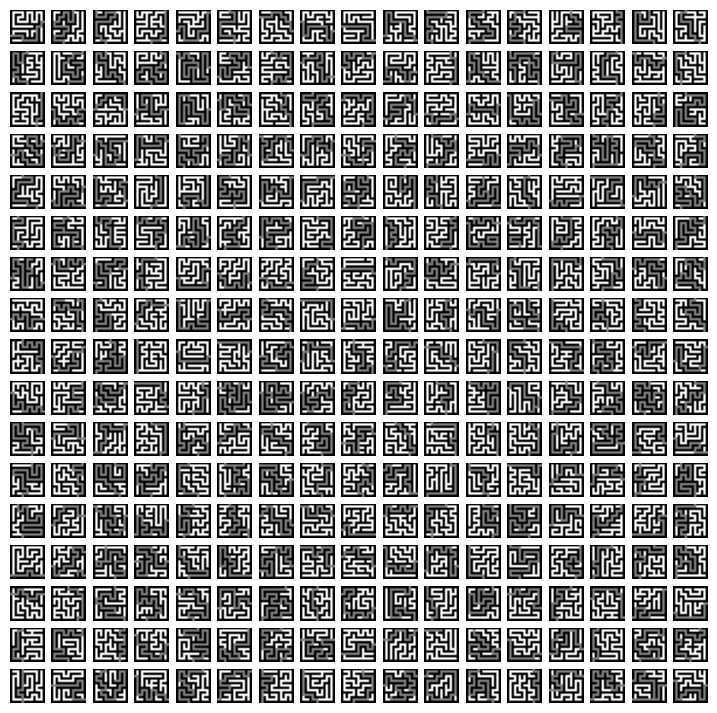

In [6]:
is_img = cfg.data.is_img
#n_samples = 9
if is_img:
    samples = samples.reshape(-1, 1, cfg.data.image_size, cfg.data.image_size)
    saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    fig = plt.figure(figsize=(9, 9)) 
    for i in range(n_samples):
        plt.subplot(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), 1 + i)
        plt.axis("off")
        plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")
 
    # saving_train_path
    plt.savefig('crm_hollow.pdf', transparent=True)
    plt.show()
    plt.close()
else:
    bm, inv_bm = synthetic.get_binmap(cfg.model.concat_dim, cfg.data.binmode)
    print(inv_bm)
    samples = synthetic.bin2float(samples.astype(np.int32), inv_bm, cfg.model.concat_dim, cfg.data.int_scale)

 
    saving_plot_path = os.path.join(path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    saving_np_path = os.path.join(path, f"samples_{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.npy")
    #np.save(f'{saving_np_path}', samples)

    #aving_plot_path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/TAUnSDDM/SavedModels/MNIST/'
    synthetic.plot_samples(samples, 'hollow_crmnll_001_lbjf500.pdf', im_size=cfg.data.plot_size, im_fmt="pdf")

In [ ]:
"""
changes_dim_mpl_ins = np.load('changing_dims_mnist_mptaul_ins_20.npy')
changes_jump_mpl_1= np.load('changing_dims_mnist_mptaul_1_20.npy')
changes_jump_mpl_1to2 = np.load('changing_dims_mnist_mptaul_1to2_20.npy')
changes_dim = np.load('changing_dims_mnist_taul_20.npy')
steps = np.linspace(1, 0, len(changes_jump_mpl_1[:-1]))
plt.gca().invert_xaxis()
#plt.plot(steps, changes_jump_mpl_1[:-1], label='MP Tau-Leaping 1')
plt.plot(steps, changes_jump_mpl_1to2[:-1], label='MP Tau-Leaping 1 to 2')
plt.plot(steps, changes_dim_mpl_ins[:-1], label='MP Tau-Leaping ins')
plt.plot(steps, changes_dim[:-1], label='Tau-Leaping', color='green')
#plt.plot(steps, canges_dim[:-1], label='Tau-Leaping 2')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Changing Dimensions', fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig('changing_dim.pdf')
plt.show()
"""

In [ ]:
"""
changes_jump_over1 = np.load('changing_dims_are_mjumps_mnist_taul_20.npy')
changes_aremjumps = np.load('changes_are_mjumps_mptaul_20.npy')
steps = np.linspace(1, 0, len(changes_jump_over1[:-1]))

plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_over1[:-1], color='black', label='Tau-Leaping')
plt.plot(steps, changes_aremjumps[:-1], label='Midpoint Tau-Leaping')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Multiple Jumps', fontsize=13)
plt.title('Avg. Proportion of Multiple Jumps in one Dim. for Tau-Leaping', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig('jumps_over_1_taul.pdf')
plt.show()
"""

In [ ]:
"""
changes_jump_over1 = np.load('changing_dims_are_mjumps_mnist_taul.npy')
changes_aremjumps = np.load('changing_dims_are_mjumps_mnist_taul.npy')
steps = np.linspace(1, 0, len(changes_jump_over1[:-1]))

plt.gca().invert_xaxis()
plt.plot(steps, changes_jump_over1[:-1], color='black', label='mjumps in dims')
plt.plot(steps, changes_aremjumps[:-1], label='changes are mjumps')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Avg. Proportion of Multiple Jumps', fontsize=13)
plt.title('Avg. Proportion of Multiple Jumps in one Dim. for Tau-Leaping', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig('jumps_over_1_taul.pdf')
plt.show()
"""

In [ ]:
import numpy as np
"""
# Erstellen eines leeren 6x1x3 Arrays
result_array = np.zeros((8, 1, 3))

# Setzen der Werte entsprechend dem gegebenen Muster
result_array[0, 0, 0] = 1.0
result_array[2, 0, 2] = 2.0
result_array[3, 0, 0] = 1.0
result_array[4, 0, 1] = 1.0
result_array[4, 0, 2] = 1.0
result_array[5, 0, 1] = 2.0
result_array[5, 0, 2] = 1.0
result_array[6, 0, 1] = 2.0
result_array[6, 0, 2] = 2.0
result_array[7, 0, 1] = 2.0
result_array[7, 0, 2] = 3.0

tensor = np.array([
    [[0.6799, 0.6674, -0.0000]],
    [[-0.0000, 0.6567, 0.6561]],
    [[-0.0000, 0.6551, 0.6551]],
    [[0.6799, -0.0000, 0.6674]],
    [[-0.0000, 0.6568, 0.6561]],
    [[0.6799, 0.6674, -0.0000]],
    [[0, 0.6674, 0.6799]],
    [[0, 0.6674, 0.6799]],
])
print(result_array)
# Regel 1: Wenn in der dritten Dimension mehrere Werte über 1 und einer ist größer als der andere, dann auf 1 und die anderen auf 0 setzen
max_values = np.max(result_array, axis=-1, keepdims=True)

min_values = np.min(result_array, axis=-1, keepdims=True)
mask = (result_array > 0) & (result_array == max_values)
result_array[mask] = 1
result_array[~mask] = 0

# Regel 2: Wenn in einer Spalte ein Wert über 1, dann diesen zu 1 setzen (für jede Spalte separat)
sum_values = np.sum(result_array > 1, axis=-1, keepdims=True)
result_array[result_array > 1] = 0

lower_values_mask = (result_array[:, :, :-1] < tensor[:, :, :-1])
result_array[:, :, :-1] = np.where(lower_values_mask, 0, result_array[:, :, :-1])

# Regel 3: Nur den höchsten Wert in tensor beibehalten
#max_values_tensor = np.max(tensor, axis=-1, keepdims=True)
#result_array = np.where(tensor == max_values_tensor, result_array, 0)
print(result_array)


find = (np.sum(result_array, axis=-1))
idx = np.where(find > 1)
print(len(idx[0]))
print(tensor)
sample_prob = tensor[idx]


x_jumps = np.array([[0], [2]])

# Qx3 result_array erstellen
result = np.zeros((x_jumps.shape[0], 3))

# Die Positionen in result_array basierend auf x_jumps festlegen
result[np.arange(x_jumps.shape[0]), x_jumps.flatten()] = 1
result_array[idx] = result
print(result_array)

"""


In [ ]:
"""
steps = [1000]# , 2000]
sampler_name = ['CRMTauL']

for sampler_n_i in sampler_name:
    for step in steps:
        data_list = []
        for i in range(20):
            print(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy')
            data_list.append(np.load(f'hollow_{sampler_n_i}{step}_mnist{i+1}.npy'))
        data = np.vstack(data_list)
        print(data.shape)
        np.save(f'Samples/mnist_hollow_{sampler_n_i}{step}_new.npy', data)
"""

In [ ]:
# clipped jumps: MNIST
"""
#np.save('PNGs/clipped_taul.npy', changes_clipped)
changes_clipped = np.load('PNGs/clipped_taul.npy')
steps = np.linspace(1, 0, len(changes_clipped[:-15]))
plt.gca().invert_xaxis()
plt.plot(steps, changes_clipped[:-15], color='black')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average Proportion of Clipped Jumps', fontsize=13)
plt.title('Average Proportion of Clipped Jumps for Tau-Leaping', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("PNGs/clipped_taul.png")
plt.show()
"""

In [ ]:
import matplotlib.pyplot as plt

# Ihre Liste von Werten
werte = [1, 1.5, 4, 5.5]
werte1 = [1, 1]
werte2 = [3, 3]

# Die x-Achsenbeschriftungen
x_labels = ['$t_1$', '$t_2$', '$t_3$', '$t_4$']

# Die y-Achsenwerte und Beschriftungen
y_values = [1, 2, 3, 4]
y_labels = ['$S_1$', '$S_2$', '$S_3$', '']

# Plot erstellen
plt.figure(figsize=(6.4, 2.4))  # Größe des Plots anpassen

# X-Achsenbeschriftungen setzen
plt.xticks(werte, x_labels)

# Vertikale Linien bei den Werten von t1, t2, t3, t4 zeichnen
for wert in werte:
    plt.axvline(x=wert, color='grey', linestyle='--')

# Schwarze horizontale Linien zwischen den S-Werten
for i in range(len(y_values) - 1):
    plt.plot([werte[i], werte[i+1]], [y_values[i], y_values[i+1]], color='black', linewidth=2, marker='o', markersize=8, markerfacecolor='black', markeredgecolor='white')

# Y-Achsenintervall und Beschriftung setzen
plt.yticks(y_values, y_labels)

# Achsentitel setzen
plt.xlabel('Time')
plt.ylabel('State')

# Titel hinzufügen


# Plot anzeigen
plt.grid(False)
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Ihre Liste von Werten
werte = [1, 1.5, 4, 5.5]
werte1 = [1, 1]
werte2 = [3, 3]

# Die x-Achsenbeschriftungen
x_labels = ['$t_1$', '$t_2$', '$t_3$', '$t_4$']

# Die y-Achsenwerte und Beschriftungen
y_values = [0.25, 1, 2, 3, 3.5]
y_labels = ['', '$S_1$', '$S_2$', '$S_3$', '']

# Plot erstellen
plt.figure(figsize=(12.8, 4.8))  # Größe des Plots anpassen
#plt.plot(werte, y_values, marker='o', linestyle='-', color='black')

# X-Achsenbeschriftungen setzen
plt.xticks(werte, x_labels)

# Vertikale Linien bei den Werten von t1, t2, t3, t4 zeichnen
for wert in werte:
    plt.axvline(x=wert, color='grey', linestyle='--')

# Schwarze horizontale Linien zwischen den S-Werten

plt.hlines(y_values[2], werte[0], werte[1], color='black', linewidth=2)
plt.hlines(y_values[1], werte[1], werte[2], color='black', linewidth=2)
plt.hlines(y_values[3], werte[2], werte[3], color='black', linewidth=2)
plt.plot(werte[0], y_values[2], color='black', marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black')
plt.plot(werte[1], y_values[1], color='black', marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black')
plt.plot(werte[2], y_values[3], color='black', marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black')

plt.plot(werte[1], y_values[2], color='black', marker='o', markersize=5, markerfacecolor='white', markeredgecolor='black')
plt.plot(werte[2], y_values[1], color='black', marker='o', markersize=5, markerfacecolor='white', markeredgecolor='black')
plt.plot(werte[3], y_values[3], color='black', marker='o', markersize=5, markerfacecolor='white', markeredgecolor='black')
# Y-Achsenintervall und Beschriftung setzen
plt.yticks(y_values, y_labels)

# Achsentitel setzen

# Titel hinzufügen
plt.title('')

# Plot anzeigen
plt.grid(False)
plt.savefig('ctmc.pdf', format='pdf',bbox_inches="tight", transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Ihre Liste von Werten
werte = [1, 1.5, 4, 5.5]

# Die x-Achsenbeschriftungen
x_labels = ['$t_1$', '$t_2$', '$t_3$', '$t_4$']

# Die y-Achsenwerte und Beschriftungen
y_values = [1, 2, 3, 4]
y_labels = ['$S_1$', '$S_2$', '$S_3$', '']

# Plot erstellen
fig, ax = plt.subplots(figsize=(6.4, 2.4))  # Größe des Plots anpassen

# Pfeile an den X- und Y-Achsen hinzufügen
import matplotlib.pyplot as plt

# Ihre Liste von Werten
werte = [1, 1.5, 4, 5.5]

# Die x-Achsenbeschriftungen
x_labels = ['$t_1$', '$t_2$', '$t_3$', '$t_4$']

# Die y-Achsenwerte und Beschriftungen
y_values = [1, 2, 3, 4]
y_labels = ['$S_1$', '$S_2$', '$S_3$', '']

# Plot erstellen
fig, ax = plt.subplots(figsize=(12.8, 4.8))  # Größe des Plots anpassen

# Pfeile an den X- und Y-Achsen hinzufügen
ax.arrow(0, 0, 6.5, 0, head_width=0.1, head_length=0.2, fc='black', ec='black', label='X-Achse')
ax.arrow(0, 0, 0, 4.5, head_width=0.1, head_length=0.2, fc='black', ec='black', label='Y-Achse')

# X-Achsenbeschriftungen setzen
plt.xticks(werte, x_labels)

# Schwarze horizontale Linien zwischen den S-Werten
plt.hlines(y_values[1], werte[0], werte[1], color='black', linewidth=2)
plt.hlines(y_values[0], werte[1], werte[2], color='black', linewidth=2)
plt.hlines(y_values[2], werte[2], werte[3], color='black', linewidth=2)

# Schwarze Kreise am Anfang und Ende der horizontalen Linien
plt.plot(werte[0], y_values[1], color='black', marker='o', markersize=6, markerfacecolor='black', markeredgecolor='black')
plt.plot(werte[3], y_values[2], color='black', marker='o', markersize=6, markerfacecolor='black', markeredgecolor='black')

# Weiße Kreise am Anfang und Ende der horizontalen Linien
plt.plot(werte[1], y_values[0], color='black', marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
plt.plot(werte[2], y_values[2], color='black', marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')
plt.plot(werte[3], y_values[0], color='black', marker='o', markersize=6, markerfacecolor='white', markeredgecolor='black')

# Y-Achsenintervall und Beschriftung setzen
plt.yticks(y_values, y_labels)

# Achsentitel setzen
plt.xlabel('Time')
plt.ylabel('State')

# Kein Gitter anzeigen
ax.grid(False)

# Plot anzeigen
plt.show()
